# MixedStates ptychography
 - This tutorial shows a reconstruction for a dataset where the probe beam is not fully coherent spatially. So 4 spatial modes (npsm=4) are needed for this reconstruction.   
 - The dataset and results are published in the article: "Loetgering, Lars, et al. "Generation and characterization of focused helical x-ray beams." Science advances 6.7 (2020): eaax8836."
 - Download the dataset from figshare: https://figshare.com/articles/dataset/PtyLab_helical_beam_data/21671516
 - A kind suggestion: check out general tutorials for CPM (conventional ptychographic microscopy) before diving into this one.

In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import h5py

In [2]:
# import the PtyLab module
import PtyLab
from PtyLab import ExperimentalData
from PtyLab import Reconstruction
from PtyLab import Monitor
from PtyLab import Params
from PtyLab import Engines

C:\ProgramData\Anaconda3\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


Step 1: Download the preprocessed data from figshare: https://figshare.com/articles/dataset/PtyLab_helical_beam_data/21671516

In [3]:
# set your data folder as fileFolder 
fileFolder = Path(r"D:\Du\FigshareData")
# select the hdf5 file
fileName = "ptyLab_helical_beam.h5"
# create the complete filePath
filePath = Path.joinpath(fileFolder,fileName)

Step 2: Initialize the ExperimentalData class 

In [17]:
# Initialize the ExperimentalData using the filePath, and choose the operation Mode (default is 'CPM')
experimentalData = ExperimentalData(filePath, operationMode='CPM')
# 
experimentalData.setOrientation(4)

# show measured ptychogram in log scale. Need to close the window to continue
experimentalData.showPtychogram()

Found encoder with shape (2, 1600)
(1600, 2) [ 1.52465931e-22 -9.48676901e-22]
"Unable to open object (object 'orientation' doesn't exist)"
Min max ptychogram: 0.0, 11263.66796875
Min max ptychogram: 0.0, 4.05171839521965
0.0 4.05171839521965


Step 3: Initialize the Monitor class and set properties

In [18]:
# Initialize the Monitor class
monitor = Monitor()
# Set monitor properties
monitor.figureUpdateFrequency = 1 
monitor.objectPlot = 'complex'  # complex abs angle
monitor.verboseLevel = 'high'  # high: plot two figures, low: plot only one figure
monitor.probeZoom = 1  # control probe plot FoV
monitor.objectZoom = 2   # control object plot FoV
monitor.objectContrast = 1  # control object plot contrast, 0-1, higher constrast with smaller number
monitor.probeContrast = 0.5  # control probe plot contrast, 0-1, higher constrast with smaller number

Step 4: Initialize the Params class and set properties

In [19]:
# Initialize the Params class
params = Params()
# Set params properties
params.gpuSwitch = True
params.positionOrder = 'random'  # 'sequential' or 'random'
params.propagator = 'Fraunhofer'  # Fraunhofer Fresnel ASP scaledASP polychromeASP scaledPolychromeASP
params.probePowerCorrectionSwitch = True
params.comStabilizationSwitch = True
params.fftshiftSwitch = True
params.backgroundModeSwitch = True
params.intensityConstraint = 'standard'  

Step 5: Initialize the Reconstruction class and set properties

In [20]:
# Initialize the Reconstruction class
reconstruction = Reconstruction(experimentalData, params)
reconstruction.npsm = 4

# choose the inital format of the probe and object, and initialize them
reconstruction.initialProbe = 'circ'
reconstruction.initialObject = 'ones'
reconstruction.initializeObjectProbe()

# Optional: customize initial probe quadratic phase: 
# since we know our beam is divergent, we add a diverging wavefront to the initial beam
reconstruction.probe = reconstruction.probe*np.exp(1.j*2*np.pi/reconstruction.wavelength *
                                             (reconstruction.Xp**2+reconstruction.Yp**2)/(3*6e-3))

Copying attribute wavelength
Copying attribute dxd
Copying attribute theta
Copying attribute spectralDensity
Copying attribute entrancePupilDiameter


Step 6: Choose the engine, set the properties, and do reconstruction

check fftshift...
fftshift data for fast far-field update


<IPython.core.display.Javascript object>


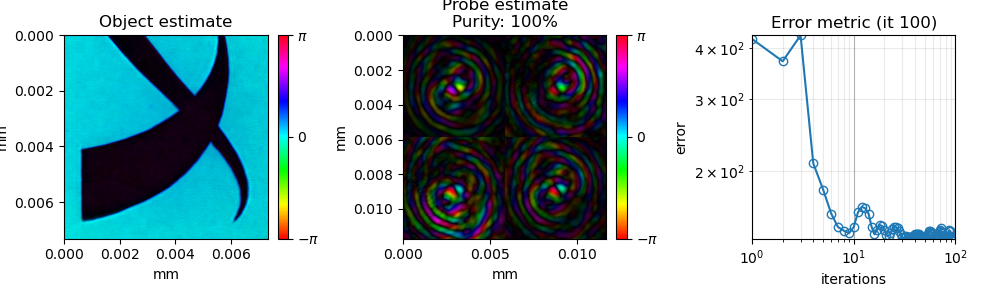

<IPython.core.display.Javascript object>


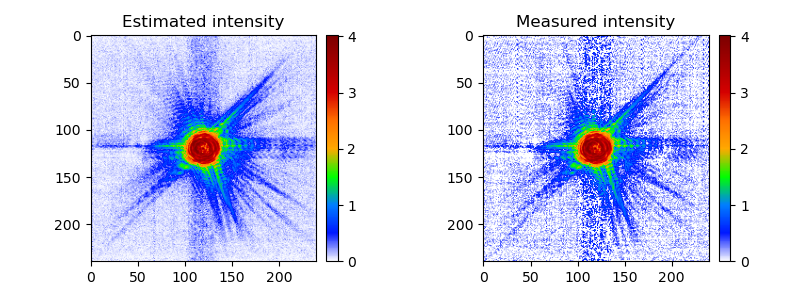

ptychogram:  98%|███████████████████████████████████████████████████████████████▊ | 1570/1600 [00:02<00:00, 606.28it/s]
                                                                                                                       Center of mass: -4 -3
                                                                                                                       
iteration: 0                                                                                                           
error: 421.5                                                                                                           
estimated linear overlap: 97.3 %                                                                                       
estimated area overlap: 75.7 %                                                                                         
ptychogram:  98%|███████████████████████████████████████████████████████████████▉ | 1574/1600 [00:02<00:00, 602.65it/s]
                   

ptychogram:  98%|███████████████████████████████████████████████████████████████▉ | 1573/1600 [00:02<00:00, 602.74it/s]
                                                                                                                       Center of mass: 17 -24
                                                                                                                       
iteration: 2                                                                                                           
error: 430.4                                                                                                           
estimated linear overlap: 96.4 %                                                                                       
estimated area overlap: 50.3 %                                                                                         
ptychogram:  96%|██████████████████████████████████████████████████████████████▋  | 1543/1600 [00:02<00:00, 601.05it/s]
                  

ptychogram:  98%|███████████████████████████████████████████████████████████████▊ | 1570/1600 [00:02<00:00, 600.40it/s]
                                                                                                                       Center of mass: 20 -7
                                                                                                                       
iteration: 4                                                                                                           
error: 180.6                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 61.3 %                                                                                         
ptychogram:  99%|████████████████████████████████████████████████████████████████▎| 1582/1600 [00:02<00:00, 565.90it/s]
                   

ptychogram:  98%|███████████████████████████████████████████████████████████████▉ | 1575/1600 [00:02<00:00, 607.60it/s]
                                                                                                                       Center of mass: 2 -2
                                                                                                                       
iteration: 6                                                                                                           
error: 146.3                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 80.4 %                                                                                         
ptychogram: 100%|████████████████████████████████████████████████████████████████▊| 1594/1600 [00:02<00:00, 602.12it/s]
                    

ptychogram:  99%|████████████████████████████████████████████████████████████████▌| 1590/1600 [00:02<00:00, 599.65it/s]
                                                                                                                       Center of mass: -10 -1
                                                                                                                       
iteration: 8                                                                                                           
error: 141.3                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 78.2 %                                                                                         
ptychogram:  99%|████████████████████████████████████████████████████████████████ | 1578/1600 [00:02<00:00, 594.12it/s]
                  

ptychogram: 100%|████████████████████████████████████████████████████████████████▋| 1593/1600 [00:02<00:00, 585.50it/s]
                                                                                                                       Center of mass: -5 -1
                                                                                                                       
iteration: 10                                                                                                          
error: 158.8                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 76.8 %                                                                                         
ptychogram:  96%|██████████████████████████████████████████████████████████████▋  | 1544/1600 [00:02<00:00, 609.08it/s]
                   

ptychogram:  99%|████████████████████████████████████████████████████████████████ | 1577/1600 [00:02<00:00, 593.15it/s]
                                                                                                                       Center of mass: 4 -2
                                                                                                                       
iteration: 12                                                                                                          
error: 162.5                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 73.8 %                                                                                         
ptychogram: 100%|████████████████████████████████████████████████████████████████▊| 1595/1600 [00:02<00:00, 608.49it/s]
                    

ptychogram:  96%|██████████████████████████████████████████████████████████████▌  | 1539/1600 [00:02<00:00, 609.76it/s]
                                                                                                                       Center of mass: 12 0
                                                                                                                       
iteration: 14                                                                                                          
error: 146.4                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 78.1 %                                                                                         
ptychogram:  97%|███████████████████████████████████████████████████████████████  | 1551/1600 [00:02<00:00, 606.27it/s]
                    

ptychogram:  96%|██████████████████████████████████████████████████████████████▌  | 1541/1600 [00:02<00:00, 606.33it/s]
                                                                                                                       Center of mass: 4 1
                                                                                                                       
iteration: 16                                                                                                          
error: 144.1                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 74.1 %                                                                                         
ptychogram:  98%|███████████████████████████████████████████████████████████████▉ | 1575/1600 [00:02<00:00, 584.76it/s]
                     

ptychogram:  97%|███████████████████████████████████████████████████████████████▏ | 1555/1600 [00:02<00:00, 600.57it/s]
                                                                                                                       Center of mass: -3 3
                                                                                                                       
iteration: 18                                                                                                          
error: 147.1                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 77.0 %                                                                                         
ptychogram:  97%|██████████████████████████████████████████████████████████████▊  | 1547/1600 [00:02<00:00, 608.03it/s]
                    

ptychogram:  96%|██████████████████████████████████████████████████████████████▌  | 1539/1600 [00:02<00:00, 620.48it/s]
                                                                                                                       Center of mass: -6 1
                                                                                                                       
iteration: 20                                                                                                          
error: 139.5                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 82.6 %                                                                                         
ptychogram:  97%|███████████████████████████████████████████████████████████████▏ | 1555/1600 [00:02<00:00, 598.51it/s]
                    

ptychogram:  96%|██████████████████████████████████████████████████████████████▌  | 1540/1600 [00:02<00:00, 572.72it/s]
                                                                                                                       Center of mass: -3 -2
                                                                                                                       
iteration: 22                                                                                                          
error: 141.4                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 76.2 %                                                                                         
ptychogram:  98%|███████████████████████████████████████████████████████████████▍ | 1560/1600 [00:02<00:00, 604.84it/s]
                   

ptychogram: 100%|████████████████████████████████████████████████████████████████▊| 1596/1600 [00:02<00:00, 609.62it/s]
                                                                                                                       Center of mass: 0 -2
                                                                                                                       
iteration: 24                                                                                                          
error: 146.5                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 77.8 %                                                                                         
ptychogram:  98%|███████████████████████████████████████████████████████████████▋ | 1569/1600 [00:02<00:00, 610.97it/s]
                    

ptychogram:  97%|███████████████████████████████████████████████████████████████▎ | 1559/1600 [00:02<00:00, 610.57it/s]
                                                                                                                       Center of mass: 2 -1
                                                                                                                       
iteration: 26                                                                                                          
error: 145.1                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 74.4 %                                                                                         
ptychogram:  97%|███████████████████████████████████████████████████████████████  | 1551/1600 [00:02<00:00, 589.29it/s]
                    

ptychogram:  96%|██████████████████████████████████████████████████████████████▌  | 1540/1600 [00:02<00:00, 607.05it/s]
                                                                                                                       Center of mass: 4 2
                                                                                                                       
iteration: 28                                                                                                          
error: 140.3                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
ptychogram: 100%|█████████████████████████████████████████████████████████████████| 1600/1600 [00:02<00:00, 601.12it/s]
                     

ptychogram:  98%|███████████████████████████████████████████████████████████████▊ | 1570/1600 [00:02<00:00, 607.59it/s]
                                                                                                                       Center of mass: 3 1
                                                                                                                       
iteration: 30                                                                                                          
error: 137.5                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 93.9 %                                                                                         
ptychogram:  99%|████████████████████████████████████████████████████████████████ | 1578/1600 [00:02<00:00, 603.79it/s]
                     

ptychogram:  98%|███████████████████████████████████████████████████████████████▊ | 1572/1600 [00:02<00:00, 607.87it/s]
                                                                                                                       Center of mass: 1 0
                                                                                                                       
iteration: 32                                                                                                          
error: 138.9                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 80.3 %                                                                                         
ptychogram:  99%|████████████████████████████████████████████████████████████████ | 1577/1600 [00:02<00:00, 605.85it/s]
                     

ptychogram:  98%|███████████████████████████████████████████████████████████████▉ | 1575/1600 [00:02<00:00, 575.82it/s]
                                                                                                                       Center of mass: -2 1
                                                                                                                       
iteration: 34                                                                                                          
error: 138.5                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 93.2 %                                                                                         
ptychogram:  99%|████████████████████████████████████████████████████████████████▎| 1582/1600 [00:02<00:00, 598.37it/s]
                    

ptychogram:  98%|███████████████████████████████████████████████████████████████▊ | 1570/1600 [00:02<00:00, 604.09it/s]
                                                                                                                       Center of mass: -3 0
                                                                                                                       
iteration: 36                                                                                                          
error: 138.6                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 79.7 %                                                                                         
ptychogram:  98%|███████████████████████████████████████████████████████████████▍ | 1560/1600 [00:02<00:00, 602.23it/s]
                    

ptychogram: 100%|████████████████████████████████████████████████████████████████▊| 1595/1600 [00:02<00:00, 606.68it/s]
                                                                                                                       Center of mass: -1 -1
                                                                                                                       
iteration: 38                                                                                                          
error: 139.6                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 76.9 %                                                                                         
ptychogram:  99%|████████████████████████████████████████████████████████████████ | 1578/1600 [00:02<00:00, 569.87it/s]
                   

ptychogram:  98%|████████████████████████████████████████████████████████████████ | 1576/1600 [00:02<00:00, 606.46it/s]
                                                                                                                       Center of mass: -1 0
                                                                                                                       
iteration: 40                                                                                                          
error: 140.9                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 76.7 %                                                                                         
ptychogram:  99%|████████████████████████████████████████████████████████████████▌| 1588/1600 [00:02<00:00, 590.40it/s]
                    

ptychogram:  98%|███████████████████████████████████████████████████████████████▌ | 1566/1600 [00:02<00:00, 602.33it/s]
                                                                                                                       Center of mass: 1 1
                                                                                                                       
iteration: 42                                                                                                          
error: 140.5                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 76.7 %                                                                                         
ptychogram:  97%|██████████████████████████████████████████████████████████████▊  | 1545/1600 [00:02<00:00, 595.99it/s]
                     

ptychogram:  98%|███████████████████████████████████████████████████████████████▋ | 1568/1600 [00:02<00:00, 564.74it/s]
                                                                                                                       Center of mass: 3 0
                                                                                                                       
iteration: 44                                                                                                          
error: 139.2                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
ptychogram:  97%|███████████████████████████████████████████████████████████████▏ | 1556/1600 [00:02<00:00, 605.04it/s]
                     

ptychogram:  98%|███████████████████████████████████████████████████████████████▊ | 1572/1600 [00:02<00:00, 593.95it/s]
                                                                                                                       Center of mass: 2 0
                                                                                                                       
iteration: 46                                                                                                          
error: 137.9                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 86.7 %                                                                                         
ptychogram:  96%|██████████████████████████████████████████████████████████████▋  | 1542/1600 [00:02<00:00, 613.57it/s]
                     

ptychogram:  99%|████████████████████████████████████████████████████████████████▏| 1580/1600 [00:02<00:00, 605.32it/s]
                                                                                                                       Center of mass: 1 0
                                                                                                                       
iteration: 48                                                                                                          
error: 137.7                                                                                                           
estimated linear overlap: 95.9 %                                                                                       
estimated area overlap: 81.8 %                                                                                         
ptychogram:  98%|███████████████████████████████████████████████████████████████▊ | 1570/1600 [00:02<00:00, 592.04it/s]
                     

ptychogram:  96%|██████████████████████████████████████████████████████████████▍  | 1538/1600 [00:02<00:00, 611.78it/s]
                                                                                                                       Center of mass: -2 3
                                                                                                                       
iteration: 50                                                                                                          
error: 137.6                                                                                                           
estimated linear overlap: 95.9 %                                                                                       
estimated area overlap: 90.2 %                                                                                         
ptychogram:  96%|██████████████████████████████████████████████████████████████▋  | 1542/1600 [00:02<00:00, 592.10it/s]
                    

ptychogram:  98%|███████████████████████████████████████████████████████████████▌ | 1565/1600 [00:02<00:00, 612.64it/s]
                                                                                                                       Center of mass: -4 0
                                                                                                                       
iteration: 52                                                                                                          
error: 138.1                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 77.2 %                                                                                         
ptychogram:  98%|████████████████████████████████████████████████████████████████ | 1576/1600 [00:02<00:00, 603.62it/s]
                    

                                                                                                                       Center of mass: -1 -2
                                                                                                                       
iteration: 54                                                                                                          
error: 143.2                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 77.6 %                                                                                         
ptychogram:  98%|███████████████████████████████████████████████████████████████▋ | 1567/1600 [00:02<00:00, 603.19it/s]
                                                                                                                       Center of mass: 0 -1

                                                                                                                       Center of mass: 0 -2
                                                                                                                       
iteration: 56                                                                                                          
error: 142.2                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 76.8 %                                                                                         
ptychogram:  96%|██████████████████████████████████████████████████████████████▋  | 1543/1600 [00:02<00:00, 607.90it/s]
                                                                                                                       Center of mass: 1 -2


iteration: 58                                                                                                          
error: 141.2                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 76.4 %                                                                                         
ptychogram:  98%|███████████████████████████████████████████████████████████████▌ | 1566/1600 [00:02<00:00, 603.14it/s]
                                                                                                                       Center of mass: 3 2
                                                                                                                       
iteration: 59                                                                                                          
error: 140.5         

iteration: 60                                                                                                          
error: 138.5                                                                                                           
estimated linear overlap: 95.9 %                                                                                       
estimated area overlap: 85.9 %                                                                                         
ptychogram:  99%|████████████████████████████████████████████████████████████████▎| 1582/1600 [00:02<00:00, 557.17it/s]
                                                                                                                       Center of mass: 2 2
                                                                                                                       
iteration: 61                                                                                                          
error: 138.5         

iteration: 62                                                                                                          
error: 138.2                                                                                                           
estimated linear overlap: 95.9 %                                                                                       
estimated area overlap: 91.3 %                                                                                         
ptychogram:  97%|██████████████████████████████████████████████████████████████▉  | 1550/1600 [00:02<00:00, 605.82it/s]
                                                                                                                       Center of mass: 2 -1
                                                                                                                       
iteration: 63                                                                                                          
error: 138.0        

error: 138.0                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 82.3 %                                                                                         
ptychogram:  97%|██████████████████████████████████████████████████████████████▉  | 1549/1600 [00:02<00:00, 609.66it/s]
                                                                                                                       Center of mass: -1 1
                                                                                                                       
iteration: 65                                                                                                          
error: 138.1                                                                                                           
estimated linear ove

estimated area overlap: 84.3 %                                                                                         
ptychogram:  97%|███████████████████████████████████████████████████████████████  | 1551/1600 [00:02<00:00, 603.08it/s]
                                                                                                                       Center of mass: -5 0
                                                                                                                       
iteration: 67                                                                                                          
error: 138.0                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 77.8 %                                                                                         
ptychogram:  97%|███

ptychogram: 100%|████████████████████████████████████████████████████████████████▊| 1595/1600 [00:02<00:00, 602.07it/s]
                                                                                                                       Center of mass: -1 -1
                                                                                                                       
iteration: 69                                                                                                          
error: 143.1                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 77.4 %                                                                                         
ptychogram:  99%|████████████████████████████████████████████████████████████████▋| 1591/1600 [00:02<00:00, 602.16it/s]
                   

ptychogram:  97%|███████████████████████████████████████████████████████████████  | 1552/1600 [00:02<00:00, 602.40it/s]
                                                                                                                       Center of mass: 1 -1
                                                                                                                       
iteration: 71                                                                                                          
error: 145.2                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 77.3 %                                                                                         
ptychogram:  99%|████████████████████████████████████████████████████████████████▏| 1581/1600 [00:02<00:00, 604.70it/s]
                    

ptychogram:  99%|████████████████████████████████████████████████████████████████▎| 1582/1600 [00:02<00:00, 594.59it/s]
                                                                                                                       Center of mass: 3 -2
                                                                                                                       
iteration: 73                                                                                                          
error: 141.7                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 79.5 %                                                                                         
ptychogram:  98%|███████████████████████████████████████████████████████████████▉ | 1573/1600 [00:02<00:00, 602.19it/s]
                    

ptychogram: 100%|████████████████████████████████████████████████████████████████▋| 1592/1600 [00:02<00:00, 605.12it/s]
                                                                                                                       Center of mass: 3 3
                                                                                                                       
iteration: 75                                                                                                          
error: 138.2                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 87.6 %                                                                                         
ptychogram:  98%|███████████████████████████████████████████████████████████████▌ | 1565/1600 [00:02<00:00, 612.09it/s]
                     

ptychogram: 100%|████████████████████████████████████████████████████████████████▊| 1595/1600 [00:02<00:00, 610.50it/s]
                                                                                                                       Center of mass: 1 1
                                                                                                                       
iteration: 77                                                                                                          
error: 138.2                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 81.6 %                                                                                         
ptychogram:  99%|████████████████████████████████████████████████████████████████▍| 1586/1600 [00:02<00:00, 576.35it/s]
                     

ptychogram:  96%|██████████████████████████████████████████████████████████████▍  | 1536/1600 [00:02<00:00, 601.22it/s]
                                                                                                                       Center of mass: -2 0
                                                                                                                       
iteration: 79                                                                                                          
error: 138.6                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 93.5 %                                                                                         
ptychogram: 100%|████████████████████████████████████████████████████████████████▉| 1597/1600 [00:02<00:00, 602.93it/s]
                    

ptychogram: 100%|████████████████████████████████████████████████████████████████▉| 1599/1600 [00:02<00:00, 608.04it/s]
                                                                                                                       Center of mass: -2 0
                                                                                                                       
iteration: 81                                                                                                          
error: 138.5                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
ptychogram:  97%|██████████████████████████████████████████████████████████████▉  | 1548/1600 [00:02<00:00, 607.19it/s]
                    

ptychogram:  98%|███████████████████████████████████████████████████████████████▊ | 1571/1600 [00:02<00:00, 566.51it/s]
                                                                                                                       Center of mass: -3 -2
                                                                                                                       
iteration: 83                                                                                                          
error: 138.9                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 77.1 %                                                                                         
ptychogram:  96%|██████████████████████████████████████████████████████████████▍  | 1538/1600 [00:02<00:00, 604.94it/s]
                   

ptychogram:  97%|███████████████████████████████████████████████████████████████▎ | 1559/1600 [00:02<00:00, 595.74it/s]
                                                                                                                       Center of mass: -1 1
                                                                                                                       
iteration: 85                                                                                                          
error: 143.1                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 78.1 %                                                                                         
ptychogram:  97%|██████████████████████████████████████████████████████████████▊  | 1547/1600 [00:02<00:00, 599.23it/s]
                    

ptychogram:  99%|████████████████████████████████████████████████████████████████ | 1578/1600 [00:02<00:00, 595.71it/s]
                                                                                                                       Center of mass: 1 0
                                                                                                                       
iteration: 87                                                                                                          
error: 142.8                                                                                                           
estimated linear overlap: 95.9 %                                                                                       
estimated area overlap: 77.0 %                                                                                         
ptychogram:  98%|███████████████████████████████████████████████████████████████▉ | 1573/1600 [00:02<00:00, 583.81it/s]
                     

ptychogram:  98%|███████████████████████████████████████████████████████████████▊ | 1572/1600 [00:02<00:00, 613.99it/s]
                                                                                                                       Center of mass: 4 -4
                                                                                                                       
iteration: 89                                                                                                          
error: 139.1                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 79.5 %                                                                                         
ptychogram:  99%|████████████████████████████████████████████████████████████████▎| 1584/1600 [00:02<00:00, 597.59it/s]
                    

ptychogram:  97%|███████████████████████████████████████████████████████████████▏ | 1554/1600 [00:02<00:00, 606.52it/s]
                                                                                                                       Center of mass: 3 -2
                                                                                                                       
iteration: 91                                                                                                          
error: 137.0                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 79.3 %                                                                                         
ptychogram:  99%|████████████████████████████████████████████████████████████████▍| 1586/1600 [00:02<00:00, 610.31it/s]
                    

ptychogram:  97%|███████████████████████████████████████████████████████████████▎ | 1558/1600 [00:02<00:00, 605.75it/s]
                                                                                                                       Center of mass: 0 4
                                                                                                                       
iteration: 93                                                                                                          
error: 138.1                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 83.7 %                                                                                         
ptychogram:  99%|████████████████████████████████████████████████████████████████▎| 1583/1600 [00:02<00:00, 606.13it/s]
                     

ptychogram:  96%|██████████████████████████████████████████████████████████████▌  | 1540/1600 [00:02<00:00, 581.03it/s]
                                                                                                                       Center of mass: -2 3
                                                                                                                       
iteration: 95                                                                                                          
error: 138.1                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 81.9 %                                                                                         
ptychogram:  97%|███████████████████████████████████████████████████████████████▏ | 1554/1600 [00:02<00:00, 606.43it/s]
                    

ptychogram:  99%|████████████████████████████████████████████████████████████████▏| 1581/1600 [00:02<00:00, 597.58it/s]
                                                                                                                       Center of mass: -1 1
                                                                                                                       
iteration: 97                                                                                                          
error: 139.0                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
ptychogram:  96%|██████████████████████████████████████████████████████████████▋  | 1543/1600 [00:02<00:00, 607.07it/s]
                    

ptychogram:  99%|████████████████████████████████████████████████████████████████▏| 1579/1600 [00:02<00:00, 602.04it/s]
                                                                                                                       Center of mass: -1 -5
                                                                                                                       
iteration: 99                                                                                                          
error: 138.4                                                                                                           
estimated linear overlap: 96.0 %                                                                                       
estimated area overlap: 81.1 %                                                                                         
mPIE: 100%|██████████████████████████████████████████████████████████████████████████| 100/100 [04:54<00:00,  2.95s/it]


In [21]:
# Choose mPIE engine
mPIE = Engines.mPIE(reconstruction, experimentalData, params, monitor)
mPIE.numIterations = 100
mPIE.betaProbe = 0.25
mPIE.betaObject = 0.25
mPIE.reconstruct()

In [9]:
## now save the data
# reconstruction.saveResults('reconstruction.hdf5')